# Project 3: GDP per capita and life expectancy
By Llewellyn Deeprose-Morrison, 13th August 2020

In a previous project (My_project_3.ipynb) the relationship between a country's GDP and life expectancy was investigated. It was concluded that there was no strong correlation between the two. However, this may not be the case when GDP per capita is considered instead of just GDP as the population of the country will be accounted for. 

## Getting the data
The data that will be used will be taken directly from the World Bank's website <https://data.worldbank.org/>. It will be from the year 2013 as that is the year used in the aforementioned project.

In [130]:
import warnings
warnings.simplefilter('ignore', FutureWarning)
from pandas import *
from pandas_datareader.wb import download
YEAR = 2013
POP_INDICATOR = 'SP.POP.TOTL'
LIFE_INDICATOR = 'SP.DYN.LE00.IN'
GDP_INDICATOR = 'NY.GDP.MKTP.CD'
gdp = download(indicator = GDP_INDICATOR, country = 'all', start=YEAR, end=YEAR)
gdpReset = gdp.reset_index()
life = download(indicator = LIFE_INDICATOR, country = 'all', start=YEAR, end=YEAR)
lifeReset = life.reset_index()
pop = download(indicator = POP_INDICATOR, country = 'all', start=YEAR, end=YEAR)
popReset = pop.reset_index()
popReset.head()

,country,year,SP.POP.TOTL
0,Arab World,2013,3.797057e+08
1,Caribbean small states,2013,7.123332e+06
2,Central Europe and the Baltics,2013,1.037137e+08
3,Early-demographic dividend,2013,3.037111e+09
4,East Asia & Pacific,2013,2.252047e+09


The data has now been downloaded from the World Bank. Originally, each row had the country name as its index so as the data has been downloaded the indices have been reset to integers. The data now needs to be cleaned.

## Cleaning the data
The first 47 rows of each dataframe are for groups of countries e.g. Caribbean small states. This project aims to focus on individual countries only so the first 47 rows of each datframe need to be removed.

In [131]:
gdpAll = gdpReset[47:] #the dataframe now only contains individual countries rather than groups of countries too.
lifeAll = lifeReset[47:]
popAll = popReset[47:]

Next, all rows with no value (an entry of 'NaN') will have to be removed.

In [132]:
gdpCountries = gdpAll.dropna().reset_index()
lifeCountries = lifeAll.dropna().reset_index()
popCountries = popAll.dropna().reset_index()

## Transforming the data

The first course of action is to convert the GDP values to GBP, and then to round to the nearest million for easier comprehension.

In [133]:
def usdToGBP(x):
    return x*0.6038

GDP = 'GDP (£)'
gdpCountries[GDP] = gdpCountries[GDP_INDICATOR].apply(usdToGBP)

COUNTRY = 'country'
gdpAndPop = merge(gdpCountries, popCountries, how = 'inner', on=COUNTRY)

GDP_PC = 'GDP per capita (£)'
POP = ('Population')
gdpAndPop[GDP_PC] = round(gdpAndPop[GDP]/gdpAndPop[POP_INDICATOR])

gdpPC = gdpAndPop[[COUNTRY, GDP_PC]]
gdpPC

,country,GDP per capita (£)
0,Afghanistan,385.0
1,Albania,2665.0
2,Algeria,3321.0
3,American Samoa,6947.0
4,Andorra,23874.0
...,...,...
201,Virgin Islands (U.S.),21024.0
202,West Bank and Gaza,1848.0
203,"Yemen, Rep.",970.0
204,Zambia,1134.0


In [134]:
LIFE = 'Life expectancy (years)'
lifeCountries[LIFE] = round(lifeCountries[LIFE_INDICATOR])

lifeClean = lifeCountries[[COUNTRY, LIFE]]

gdppcVsLife = merge(gdpPC, lifeClean, how='inner', on=COUNTRY)
gdppcVsLife

,country,GDP per capita (£),Life expectancy (years)
0,Afghanistan,385.0,63.0
1,Albania,2665.0,78.0
2,Algeria,3321.0,76.0
3,Angola,3173.0,58.0
4,Antigua and Barbuda,7795.0,76.0
...,...,...,...
187,Virgin Islands (U.S.),21024.0,79.0
188,West Bank and Gaza,1848.0,73.0
189,"Yemen, Rep.",970.0,66.0
190,Zambia,1134.0,60.0


## Analysing the data
First, the Spearman rank correlation coefficient will be calculated, along with the p-value.

In [135]:
from scipy.stats import spearmanr
gdppcColumn = gdppcVsLife[GDP_PC]
lifeColumn = gdppcVsLife[LIFE]
(r, p) = spearmanr(gdppcColumn, lifeColumn)
print('The correlation coefficient is', r)
print('The p-value is', p)
if p < 0.05:
    print('This result is statistically significant.')
else:
    print('This result is not statistically significant.')

The correlation coefficient is 0.8462744904583012
The p-value is 7.457593132536436e-54
This result is statistically significant.


Using this statistical method it appears that there is a strong positive correlation between the GDP per capita and the life expectancy. This should be clearer on a graph.

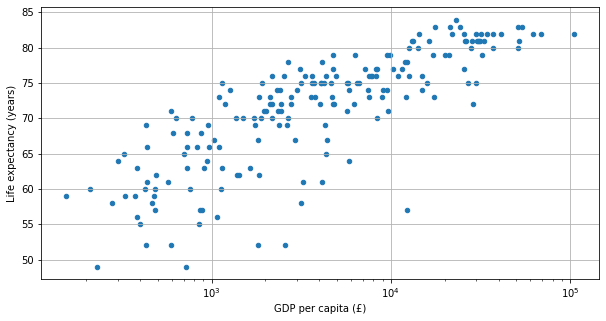

In [136]:
%matplotlib inline

gdppcVsLife.plot(x=GDP_PC, y=LIFE, grid=True, kind='scatter', logx=True, figsize=(10,5))

It is now quite apparent that as GDP per capita increases, so does the life expectancy.

## Conclusion
The reason for this correlation may be that as GDP per capita increases, individuals are more likely to be able to spend on things like healthcare, healthier food, safer equipment and so on.